# Pure numpy feedforward neural network

The NeuralNetwork class in the FeedForwardNN file is a simple neural network class coded in python using only numpy. It implements backpropagation.
* Optimization : Gradient Descent
* Layers : n fully-connected layers
* Cost function : sum squared error

In this Notebook we will use this class to create a 3-layer neural network to approximate the non-linear XOR function.

### Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from progress_bar import log_progress
import FeedforwardNN

### Hyperparameters

In [3]:
nodes = 9  # Number of nodes in our hidden layer
alpha = 5  # Learning Rate
num_epochs = 1000  # Maximum number of epochs

## Creating the network

In [4]:
# Create instance of a neural network
nn = FeedforwardNN.NeuralNetwork()

# Add Layers
# Input Layer is created automatically
nn.add_layer((2, nodes)) # Layer 2
nn.add_layer((nodes, 1)) # Layer 3

## Testing on the XOR function

Here we will test the network with the XOR function :  

| Input 1 | Input 2 | Output |
| ---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [5]:
# Create the data
training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2, 1)
training_labels = np.asarray([[0], [1], [1], [0]])

In [6]:
# Train 
# The stop accuracy tells the neural network to stop training once the error rate is under the specified threshold
# The returned iteration is the number of epochs needed to reach that accuracy
error_rate, iteration = nn.train(training_data, training_labels, num_epochs=num_epochs, learning_rate=alpha, stop_accuracy=1e-5)

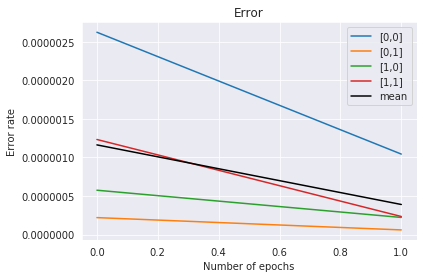

In [9]:
# Plot the error
error_rate = error_rate.reshape((iteration,4))

sns.set_style("darkgrid")
plt.plot(np.arange(iteration), error_rate[:, 0], label='[0,0]')
plt.plot(np.arange(iteration), error_rate[:, 1], label='[0,1]')
plt.plot(np.arange(iteration), error_rate[:, 2], label='[1,0]')
plt.plot(np.arange(iteration), error_rate[:, 3], label='[1,1]')
plt.plot(np.arange(iteration), np.mean(error_rate, axis=1), label='mean', color='black')
plt.title('Error')
plt.xlabel('Number of epochs')
plt.ylabel('Error rate')
plt.legend()
plt.show()

## Optimizing the network for XOR function

Here we will loop through many different combinations of number of nodes and learning rate values. We can then plot the results and find the optimal pair.

In [10]:
# List of hyperparameters
nodes_list = np.arange(4, 10, 1)
alpha_list = np.arange(0.1, 15, 0.1)
num_epochs = 100

In [11]:
# Train for all hyperparameter combinations
num_epoch_to_train = []
for nodes in log_progress(nodes_list, user_label='nodes'):
    for alpha in log_progress(alpha_list, user_label='alphas', refresh=True):
        nn = FeedforwardNN.NeuralNetwork()
        nn.add_layer((2, nodes)) # Layer 2
        nn.add_layer((nodes, 1)) # Layer 3
        error_rate, iteration = nn.train(training_data, training_labels, num_epochs=num_epochs, learning_rate=alpha, stop_accuracy=1e-6)
        num_epoch_to_train.append(iteration)

In [12]:
# Reshape for plotting
z = np.asarray(num_epoch_to_train).reshape(len(nodes_list), -1)
np.savez('mesh.npz', alpha_list, nodes_list, z)

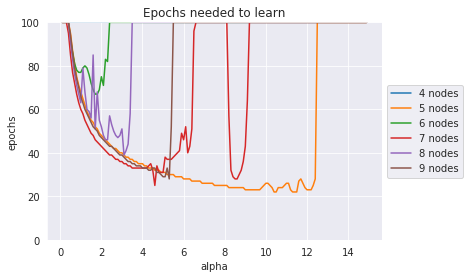

In [13]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)

sns.set_style("darkgrid")

for n in range(len(z)):
    plt.plot(alpha_list, z[n], label='{n} nodes'.format(n=n+4))

ax.set_xlabel('alpha')
ax.set_ylabel('epochs')
ax.set_ylim([0,100])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Epochs needed to learn')
plt.show()

## Conclusion

It is important to play around with different random seeds (in the initialization of the NeuralNetwork class) when searching for the optimal pair of hyperparameters.
For the seed above, it seems we can use a rather large alpha and only 5 nodes on the hidden layer in order to learn the fastest. However, using different seeds I found that usually using 7 or 9 nodes and a learning rate between 1 and 5 to be the best all-around solution.  
**To be safe and garantee convergence, a small learning rate should be chosen and the number of epochs adjusted accordingly.**